In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import shutil
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.applications import MobileNet



In [3]:
base_dir = "./data/ui_icons_dataset/"
train_dir = (os.path.join(base_dir,"train/"))
validation_dir = os.path.join(base_dir, "validation/")

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224, 224),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        class_mode='categorical')

Found 13868 images belonging to 21 classes.
Found 1531 images belonging to 21 classes.


In [5]:
EPOCHS = 15
STEPS = 120

In [13]:
def create_model():
    batch_size = 20
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    predictions = tf.keras.layers.Dense(21, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [18]:
model = create_model()
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5,min_delta=0.005, mode='max', verbose=1),
 ModelCheckpoint('MobileNet.h5', monitor='val_loss', mode='max', save_best_only=True, save_weights_only=True),
 EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
history = model.fit( train_generator, steps_per_epoch=STEPS, epochs=EPOCHS, verbose=1,validation_data = validation_generator,callbacks = callbacks)


Epoch 1/15
120/120 [==============================] - 189s 2s/step - loss: 1.6690 - accuracy: 0.4898 - val_loss: 1.2558 - val_accuracy: 0.5807 - lr: 0.0010
Epoch 2/15
120/120 [==============================] - 157s 1s/step - loss: 1.2485 - accuracy: 0.6005 - val_loss: 1.1292 - val_accuracy: 0.6342 - lr: 0.0010
Epoch 3/15
120/120 [==============================] - 140s 1s/step - loss: 1.1588 - accuracy: 0.6260 - val_loss: 1.0348 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 4/15
120/120 [==============================] - 128s 1s/step - loss: 1.0982 - accuracy: 0.6366 - val_loss: 0.9544 - val_accuracy: 0.6793 - lr: 0.0010
Epoch 5/15
120/120 [==============================] - 139s 1s/step - loss: 1.0539 - accuracy: 0.6500 - val_loss: 0.9805 - val_accuracy: 0.6695 - lr: 0.0010
Epoch 6/15
120/120 [==============================] - ETA: 0s - loss: 1.0285 - accuracy: 0.6539
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
120/120 [==============================] - 135s

In [19]:
history = model.fit( train_generator, steps_per_epoch=STEPS, epochs=EPOCHS, verbose=1,validation_data = validation_generator,callbacks = callbacks)


Epoch 1/15
120/120 [==============================] - 137s 1s/step - loss: 0.7975 - accuracy: 0.7359 - val_loss: 0.7935 - val_accuracy: 0.7315 - lr: 1.0000e-05
Epoch 2/15
120/120 [==============================] - 142s 1s/step - loss: 0.8238 - accuracy: 0.7320 - val_loss: 0.7917 - val_accuracy: 0.7315 - lr: 1.0000e-05
Epoch 3/15
120/120 [==============================] - 144s 1s/step - loss: 0.8135 - accuracy: 0.7362 - val_loss: 0.7891 - val_accuracy: 0.7309 - lr: 1.0000e-05
Epoch 4/15
120/120 [==============================] - 150s 1s/step - loss: 0.8229 - accuracy: 0.7241 - val_loss: 0.7876 - val_accuracy: 0.7335 - lr: 1.0000e-05
Epoch 5/15
120/120 [==============================] - 160s 1s/step - loss: 0.8027 - accuracy: 0.7319 - val_loss: 0.7872 - val_accuracy: 0.7355 - lr: 1.0000e-05
Epoch 6/15
120/120 [==============================] - ETA: 0s - loss: 0.7812 - accuracy: 0.7406
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
120/120 [==================

Text(0.5, 1.0, 'Training and validation loss')

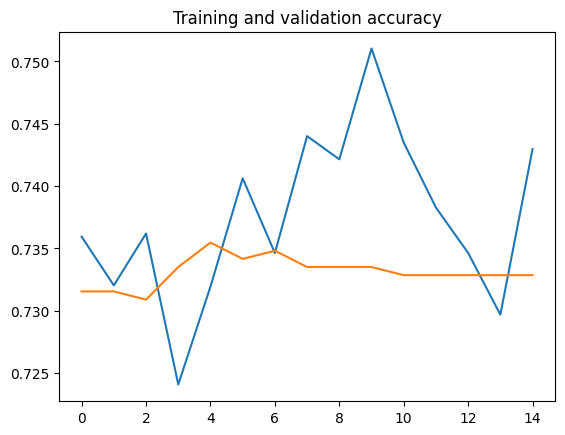

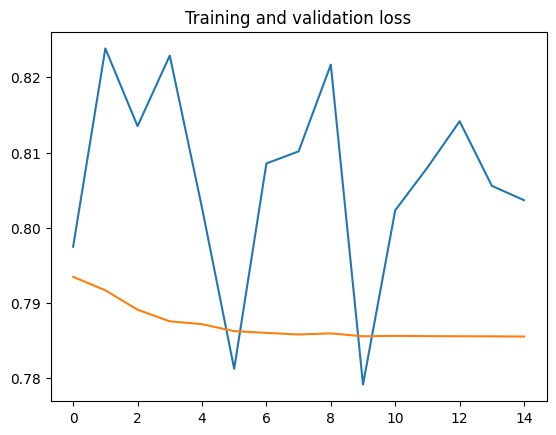

In [20]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [21]:
model_save_path = 'mobilenet'

# Save the model
model.save(model_save_path)

INFO:tensorflow:Assets written to: mobilenet\assets


INFO:tensorflow:Assets written to: mobilenet\assets


In [22]:

model_test  = tf.keras.models.load_model('mobilenet')

base_dir = "./data/ui_icons_dataset/"
test_dir = os.path.join(base_dir, "test/test")

IDs2 = []
Target2 = []

for i in range(len(os.listdir(test_dir))):
    image = cv2.imread(os.path.join(test_dir,os.listdir(test_dir)[i]))
    image = cv2.resize(image,(224,224)) 
    image = image.reshape(1,224,224,3)

    IDs2.append(os.listdir(test_dir)[i])

    prediction = model_test.predict(image)
    max_index = np.argmax(prediction)

    Target2.append(os.listdir(train_dir)[max_index])
            
df2 = pd.DataFrame({'ID': IDs2, 'Target': Target2})


1/1 [==============================] - 0s 138ms/step


In [ ]:
df2.to_csv('predictions_mobilenet.csv', index=False)


In [5]:
df = pd.read_csv("predictions_mobilenet.csv")

In [8]:
class_counts = df['Target'].value_counts()

# Display the class counts
print(class_counts)

Target
image                     1115
data_table                 965
slider                     870
menu                       627
floating_action_button     618
card                       258
radio_button_checked       205
label                       86
grid_list                   86
checkbox_checked            78
switch_enabled              76
checkbox_unchecked          54
button                      41
switch_disabled             25
dropdown_menu               16
radio_button_unchecked      10
alert                        9
text_area                    2
tooltip                      2
Name: count, dtype: int64


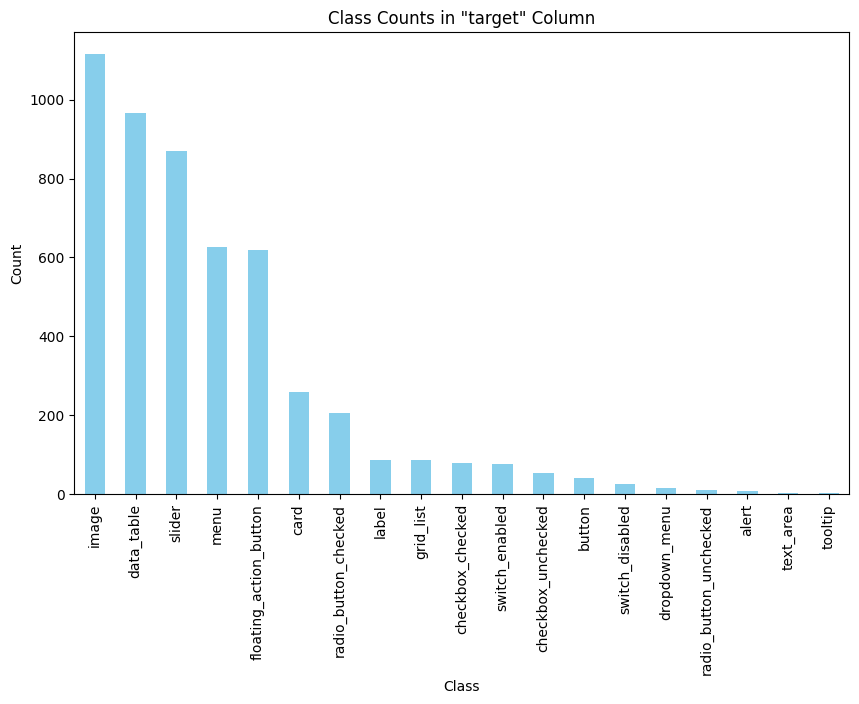

In [9]:
class_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Class Counts in "target" Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


1/1 [==============================] - 0s 403ms/step
image


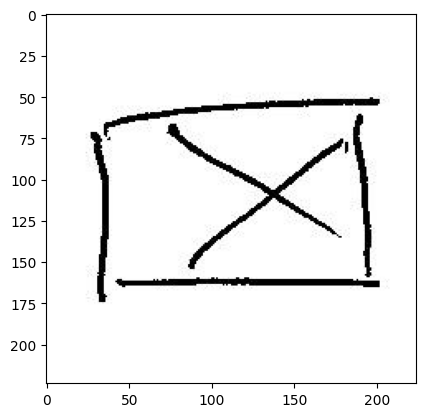

1/1 [==============================] - 0s 41ms/step
image


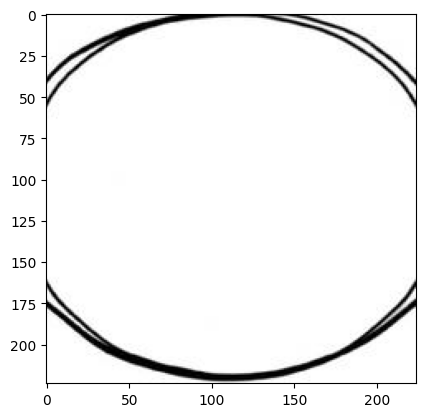

1/1 [==============================] - 0s 45ms/step
data_table


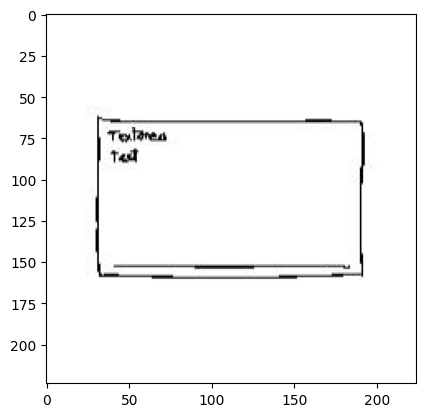

1/1 [==============================] - 0s 42ms/step
floating_action_button


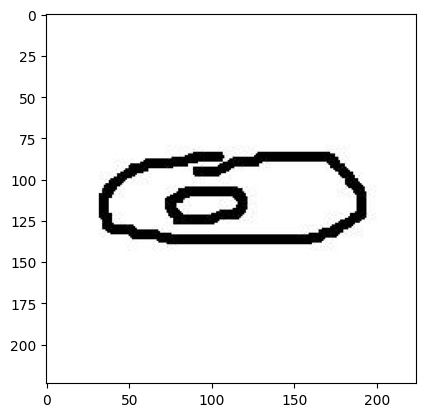

1/1 [==============================] - 0s 42ms/step
menu


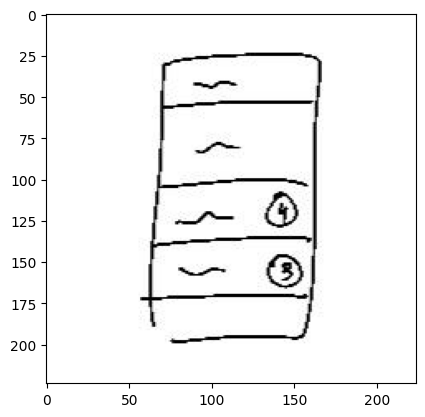

1/1 [==============================] - 0s 41ms/step
slider


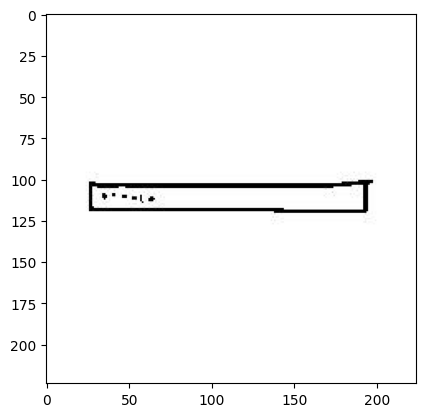

1/1 [==============================] - 0s 40ms/step
floating_action_button


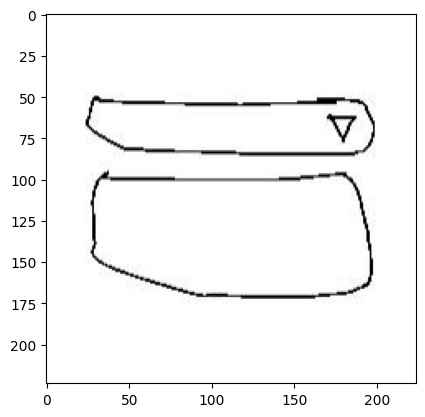

1/1 [==============================] - 0s 35ms/step
slider


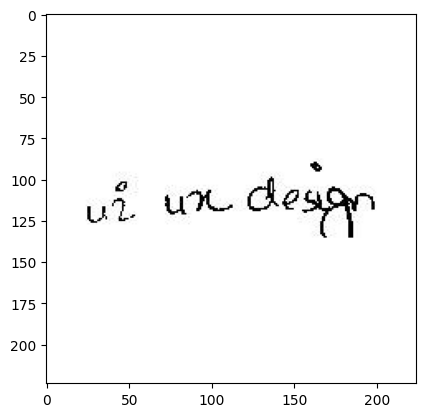

1/1 [==============================] - 0s 39ms/step
image


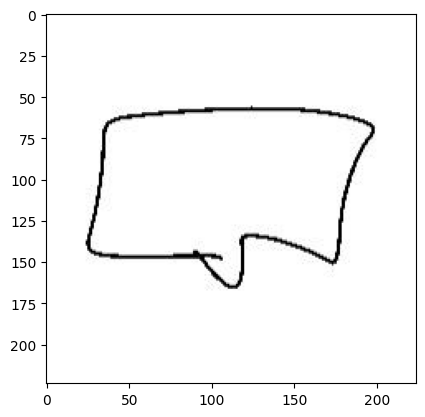

1/1 [==============================] - 0s 38ms/step
image


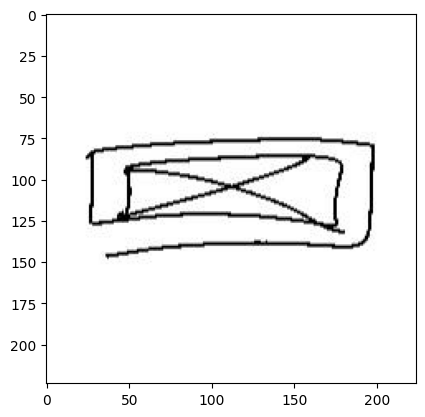

1/1 [==============================] - 0s 40ms/step
image


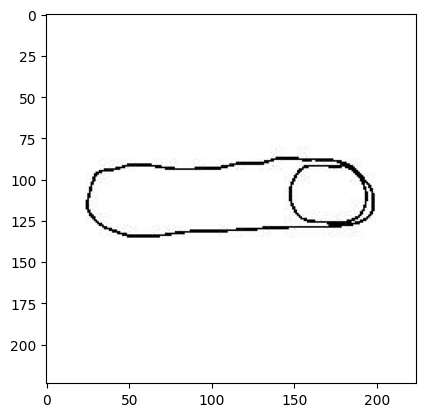

1/1 [==============================] - 0s 36ms/step
radio_button_checked


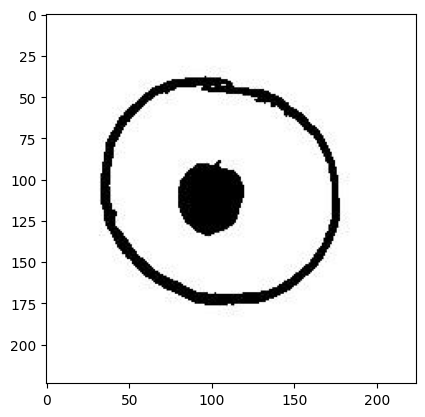

1/1 [==============================] - 0s 37ms/step
slider


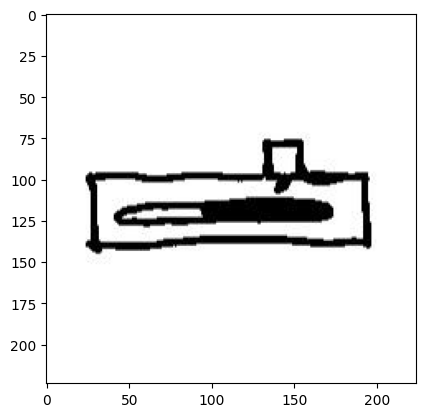

1/1 [==============================] - 0s 34ms/step
data_table


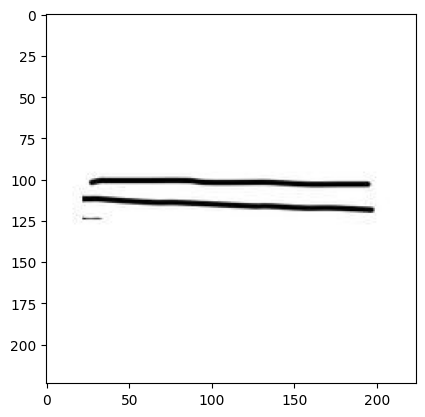

1/1 [==============================] - 0s 36ms/step
image


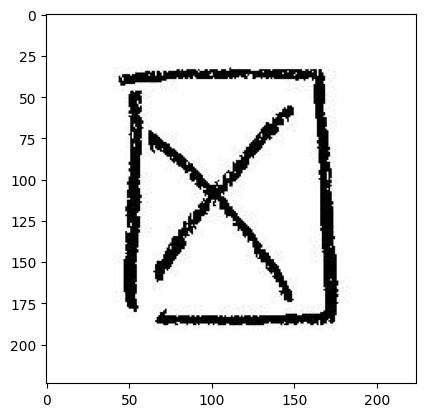

1/1 [==============================] - 0s 40ms/step
data_table


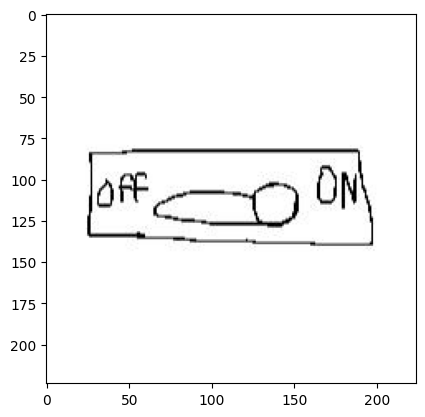

1/1 [==============================] - 0s 43ms/step
image


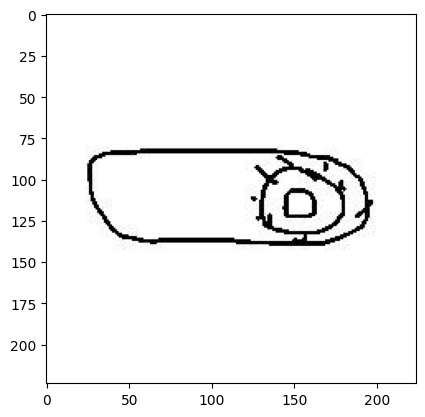

1/1 [==============================] - 0s 47ms/step
floating_action_button


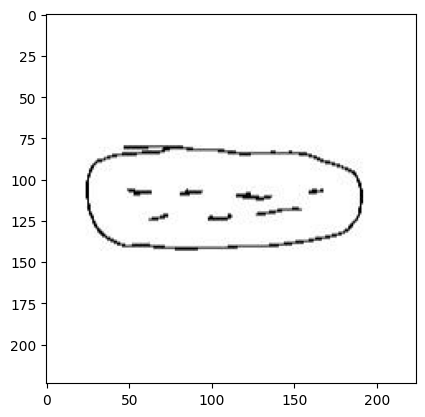

1/1 [==============================] - 0s 45ms/step
data_table


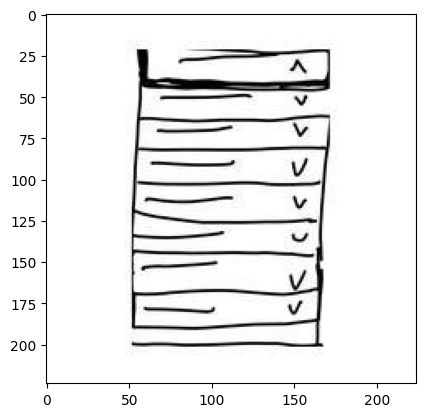

1/1 [==============================] - 0s 49ms/step
data_table


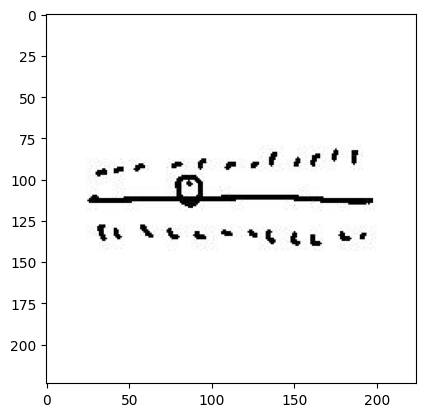

In [12]:
model_test  = tf.keras.models.load_model('mobilenet')

base_dir = "./data/ui_icons_dataset/"
test_dir = os.path.join(base_dir, "test/test")

IDs2 = []
Target2 = []

for i in range(0,20):
    image = cv2.imread(os.path.join(test_dir,os.listdir(test_dir)[i]))
    image = cv2.resize(image,(224,224)) 
    plt.imshow(image)

    image = image.reshape(1,224,224,3)


    IDs2.append(os.listdir(test_dir)[i])

    prediction = model_test.predict(image)
    max_index = np.argmax(prediction)
    print(os.listdir(train_dir)[max_index])
    plt.show()